# spark-overview

This repository holds a basic guide to use spark.
- Spark version: 2.5.2
- Python version: 3.7
In order to fullfill this requirements a [docker image](https://hub.docker.com/r/jupyter/pyspark-notebook) was used. 

## Guide to install a Docker Image
1. Install `docker` and `docker-container` - [tutorial](https://www.digitalocean.com/community/tutorials/how-to-install-and-use-docker-on-ubuntu-20-04-pt)
2. Pull [docker image](https://hub.docker.com/layers/pyspark-notebook/jupyter/pyspark-notebook/spark-2/images/sha256-ebc1a962b4fd9f489b0147c0dfb79c91f232b73337c1ac9bcee695c21e0d646c?context=explore) with this command: `docker pull jupyter/pyspark-notebook:spark-2`
3. And run it. Using this command: 
    - ```docker run -it --rm -p 8888:8888 -v "${PWD}":/home/jovyan/work jupyter/all-spark-notebook:spark-2```;
    - Or one can use the docker desktop app - following this [video tutorial](https://www.youtube.com/watch?v=DAdCrDVECwY)

### Local vs. Distributed

**Local** 
- will use the computation resources of a single machine;

**Distributed Systems** 
- has access to the computational resources across a number of machines connected through a network.
- After a certain point, it is easier to scale out to many lower CPU machines, than to try to scale up to a single machine with a high CPU.
- Easily scaling
- Fault tolerance, if one machine fails, the whole network can still go on;

### What is spark?

- Is one of the latest technologies being used to quickly and easily handle Big Data
- Open source project on Apache
- Ease of use and speed
    
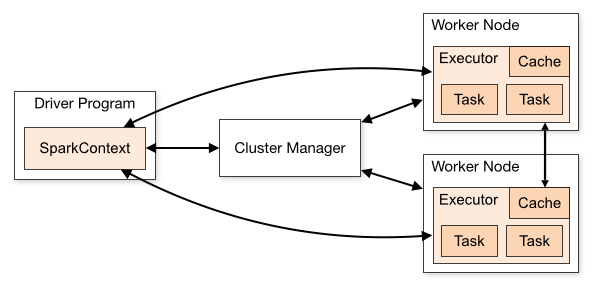

### Overview of Hadoop Ecosystem

**Hadoop**
- Distributes very large files across multiple machines

**Hadoop Distributed File System - HDFS**
- allows a user to work with large data sets
- duplicates blocks of data for fault tolerance
- It uses **MapReduce** that allows computations across a distributed data set

- It will use blocks of data, with a size of 128 MB by default;
- Each of these blocks is replicated 3 times
- Distributes in a way to support fault tolerance
- Smaller blocks provide more parallelization during processing
- Multiples copies of a block prevent loss of data due to a failure of a node
	
It is composed by: Name Node and several Data Node, each one with CPU and RAM
	
	
**MapReduce**
- is a way of splitting a computation task to a distributed set of files (such as HDFS)
- it consists of a Job Tracker and multiple Task Trackers
- Job Tracker sends code to run on the Task Trackers. 
- The Task Trackers allocate CPU and memory for the tasks and monitor the tasks on the worker nodes

**Recap:**
- Using HDFS to distribute large data sets
- Using MapReduce to distribute a computational task to a distributed data set

### Overview of Spark Ecosystem

#### Spark vs. MapReduce
- You can think of Spark as a flexible alternative to MapReduce, one should not compare spark with hadoop.
- Can use data stored in a variety of formats
    - AWS S3, HDFS, Cassandra, etc
- MapReduce requires files to be stored in HDFS, Spark does not!
- Spark also can perform operations up to 100x faster than MapReduce

**So how does it achieve this speed?**
- MapReduce writes most data to disk after each map and reduce operation
- Spark keeps most of data in memory after each transformation
- Spark can spill over to disk if the memory is filled

**Spark RDDs**
- At the core of Spark is the idea of a Resilient Distributed Dataset (RDD)
- It has 4 main features:
- Distributed collection of data
- Fault-tolerant
- Parallel operation - partioned
- Ability to use many data sources



**Spark vs. MapReduce**
- You can think of Spark as a flexible alternative to MapReduce, one should not compare spark with hadoop.
- Can use data stored in a variety of formats
    - AWS S3, HDFS, Cassandra, etc
- MapReduce requires files to be stored in HDFS, Spark does not!
- Spark also can perform operations up to 100x faster than MapReduce

    **So how does it achieve this speed?**
    - MapReduce writes most data to disk after each map and reduce operation
    - Spark keeps most of data in memory after each transformation
    - Spark can spill over to disk if the memory is filled

**Spark RDDs**
- At the core of Spark is the idea of a Resilient Distributed Dataset (RDD)
- It has 4 main features:
    - Distributed collection of data
    - Fault-tolerant
    - Parallel operation - partioned
    - Ability to use many data sources

- It consists of one Driver Program (SparkContext) <-> 1 Cluster Manager <-> Several Worker Nodes(Executer and Cache)

- They are immutable, lazily evaluated, and cacheable
- Two types of operations:
    1. Transformations - recipe to follow
    2. Actions - performs what the recipe says to do and returns something back
- One writes a method (transformation) but one cannot see anything because to see you need to perform an action
- With the release of Spark 2.0, Spark is moving towards a DataFrame based syntax, but keep in mind that the way files are being distributed can still be thought of as RDDs, it is just the typed out syntax that is changing;

**Spark DataFrames**
- Are the standard way of using spark's machine learning capabilities
- Documentation: https://spark.apache.org/

- Spark is written in scala, scala is written in java, so the more advance stuff is first released in scala, then in java, and afterwards in python and r.

### How to install spark without Docker in a Ubuntu Machine:

1. Use python3.7
2. Install jupyter notebook
3. Then update sudo - `sudo apt update`
4. Install java - `sudo apt-get install default-jre`
    - Check version: `java -version`
5. Install Scala - `sudo apt-get install scala`
    - Check version: `scala -version`
6. Install py4j - Which connects python with scala and java: `pip install py4j`
7. Install [spark version - 2.1.2/2.1.0](https://archive.apache.org/dist/spark/spark-2.1.2/)
8. Then in the folder where it was downloaded open a command line and type:
    - `sudo tar -zxvf spark-2.1.2-bin-hadoop2.7.tgz` - unzip
9. Then make it available to python:
    - `export SPARK_HOME='home/<user>/spark/spark-2.1.2-bin-hadoop2.7'`
    - `export PATH=$SPARK_HOME:$PATH`
    - `export PYTHONPATH=$SPARK_HOME/python:$PYTHONPATH`
    - `export PYSPARK_DRIVER_PYTHON="jupyter"`
    - `export PYSPARK_DRIVER_PYTHON_OPTS="notebook"`
    - `export PYSPARK_PYTHON=python3`
10. Change permissions (if needed).
    - `sudo chmod 777 ~/Documents/spark/spark-2.1.2-bin-hadoop2.7`
    - If there is locked folders one should : `sudo chmod 777 ~/Documents/spark/<foldertounlock>`
11. Then install findspark: `pip install findspark`
    - to use spark everywhere on your pc and not just on the folder that it lives;
12. Start a jupyter notebook
13. Import findspark
14. Give the path of spark folder to the findspark:
    - `findspark.init('/home/<user>/Documents/spark/spark-2.1.2-bin-hadoop2.7')`